In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# --- Data Loading ---
# The data is downloaded from https://www.data.gov.in/catalog/government-expenditure-rd-sub-sector-economic-activity
# Using io.StringIO to read the string as if it were a file.
csv_data = """S.No.,Economic Activity,NIC Code,Research & Development Expenditure (2018-19),Research & Development Expenditure (2019-20),Research & Development Expenditure (2020-21)
1,"Agriculture, Forestry and Fishing",1,12357.05,12743.11,12826.38
2,Mining and Quarrying,5,1257.65,1378.42,1256.25
3,Manufacture of Food Products,10,108.47,123.75,78.13
4,Manufacture of Textiles,13,86.1,83.61,56.71
5,"Manufacture of Wood and of Products of Wood & Cork, except Furniture",16,12.04,11.12,10.21
6,Manufacture of Chemicals and Chemical Products,20,79.64,74.31,31.51
7,Manufacture of Basic Pharmaceutical Products and Pharmaceutical Preparations,21,17.81,23.51,28.05
8,Manufacture of Rubber and Plastic Products,22,13.33,13.44,13.44
9,Manufacture of Basic Metals,24,0.99,1.82,0.04
10,"Manufacture of Computer, Electronic and other Optical Products",26,3.78,3.22,3.37
11,Manufacture of Electrical Equipment,27,269.39,239.21,160.88
12,Manufacture of Machinery and Equipment n.e.c,28,64.08,50.78,46.19
13,Other Manufacturing,32,0.01,0.01,0.01
14,"Electricity, Gas, Steam and Air Conditioning Supply",35,3419.21,3673.05,3051.5
15,Construction,41,8.18,19.86,2.37
16,"Professional, Scientific and Technical Activities",69,38105.85,40024.01,33806.2
17,Education,85,3730.3,3937.68,3794.99
18,Human Health and Social Work Activities,86,4238.98,4394.53,4405.67
19,Service Sector,90,296.8,328.55,241.87
20,Others,91,3789.73,5557.72,4348.57
"""

df = pd.read_csv(io.StringIO(csv_data))


In [ ]:
# --- Data Cleaning and Preparation ---


# Renamimg columns for easier access (removing spaces and special characters)
df.rename(columns={
    'Research & Development Expenditure (2018-19)': 'RD_2018_19',
    'Research & Development Expenditure (2019-20)': 'RD_2019_20',
    'Research & Development Expenditure (2020-21)': 'RD_2020_21'
}, inplace=True)

# Converting expenditure columns to numeric types
expenditure_cols = ['RD_2018_19', 'RD_2019_20', 'RD_2020_21']
for col in expenditure_cols:
    df[col] = pd.to_numeric(df[col])

# --- Basic Data Analysis ---
print("\n--- First 5 rows of the cleaned dataset: ---")
print(df.head())

print("\n--- Data Types and Info: ---")
df.info()

print("\n--- Statistical Summary of R&D Expenditure: ---")
print(df[expenditure_cols].describe())





--- First 5 rows of the cleaned dataset: ---
   S.No.                                  Economic Activity  NIC Code  \
0      1                  Agriculture, Forestry and Fishing         1   
1      2                               Mining and Quarrying         5   
2      3                       Manufacture of Food Products        10   
3      4                            Manufacture of Textiles        13   
4      5  Manufacture of Wood and of Products of Wood & ...        16   

   RD_2018_19  RD_2019_20  RD_2020_21  
0    12357.05    12743.11    12826.38  
1     1257.65     1378.42     1256.25  
2      108.47      123.75       78.13  
3       86.10       83.61       56.71  
4       12.04       11.12       10.21  

--- Data Types and Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              20 non-null     int64  

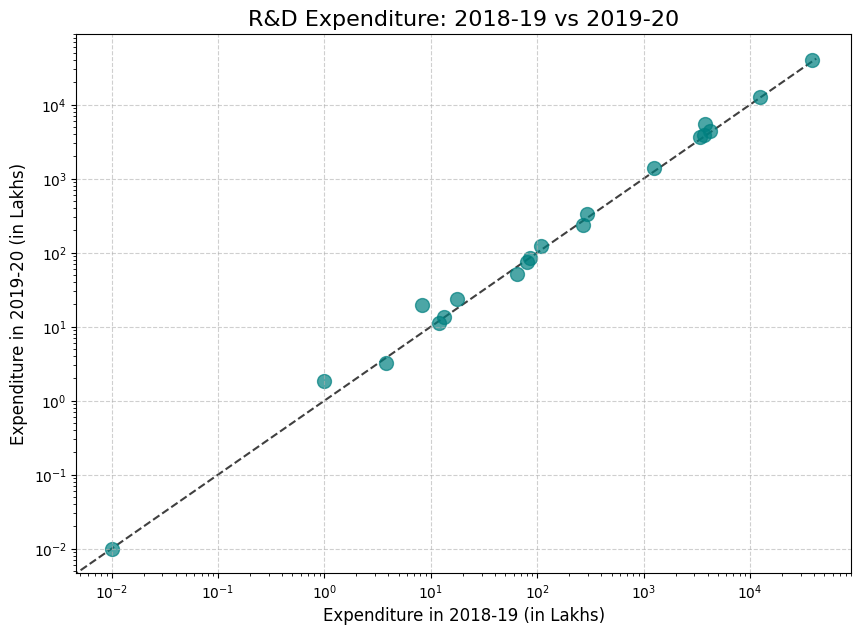

In [ ]:
# --- Matplotlib Visualizations ---

# --- Scatter Plot ---
# This plot compares the R&D spending of 2018-19 against 2019-20.
# It helps visualize if sectors that spent more in one year continued to do so in the next.
plt.figure(figsize=(10, 7))
plt.scatter(df['RD_2018_19'], df['RD_2019_20'], alpha=0.7, color='teal', s=100)

# Adding a reference line (y=x) to see which sectors increased or decreased spending
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

plt.title('R&D Expenditure: 2018-19 vs 2019-20', fontsize=16)
plt.xlabel('Expenditure in 2018-19 (in Lakhs)', fontsize=12)
plt.ylabel('Expenditure in 2019-20 (in Lakhs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xscale('log') # Using a log scale due to a few very high values
plt.yscale('log') # Using a log scale due to a few very high values
plt.show()



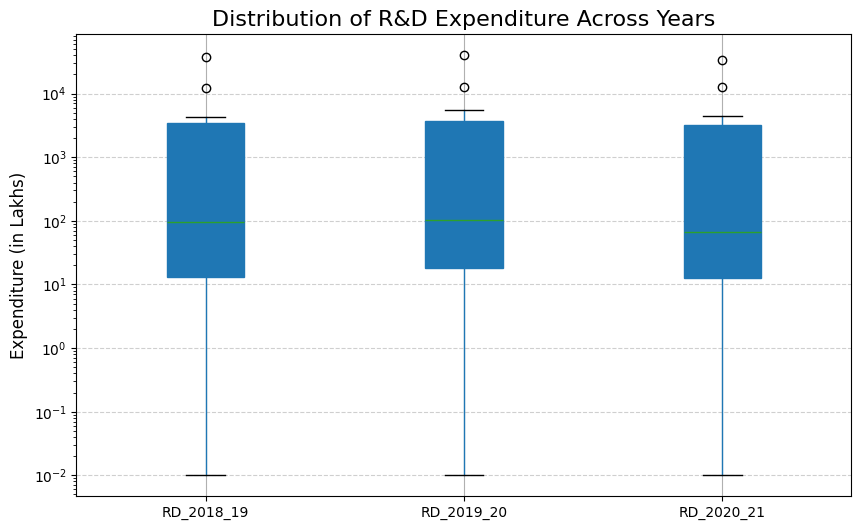

In [ ]:
# --- Box Plot ---

plt.figure(figsize=(10, 6))
df[expenditure_cols].boxplot(patch_artist=True)

plt.title('Distribution of R&D Expenditure Across Years', fontsize=16)
plt.ylabel('Expenditure (in Lakhs)', fontsize=12)
# The y-axis is on a log scale to better visualize the box plots,
# as the data has a wide range.
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()




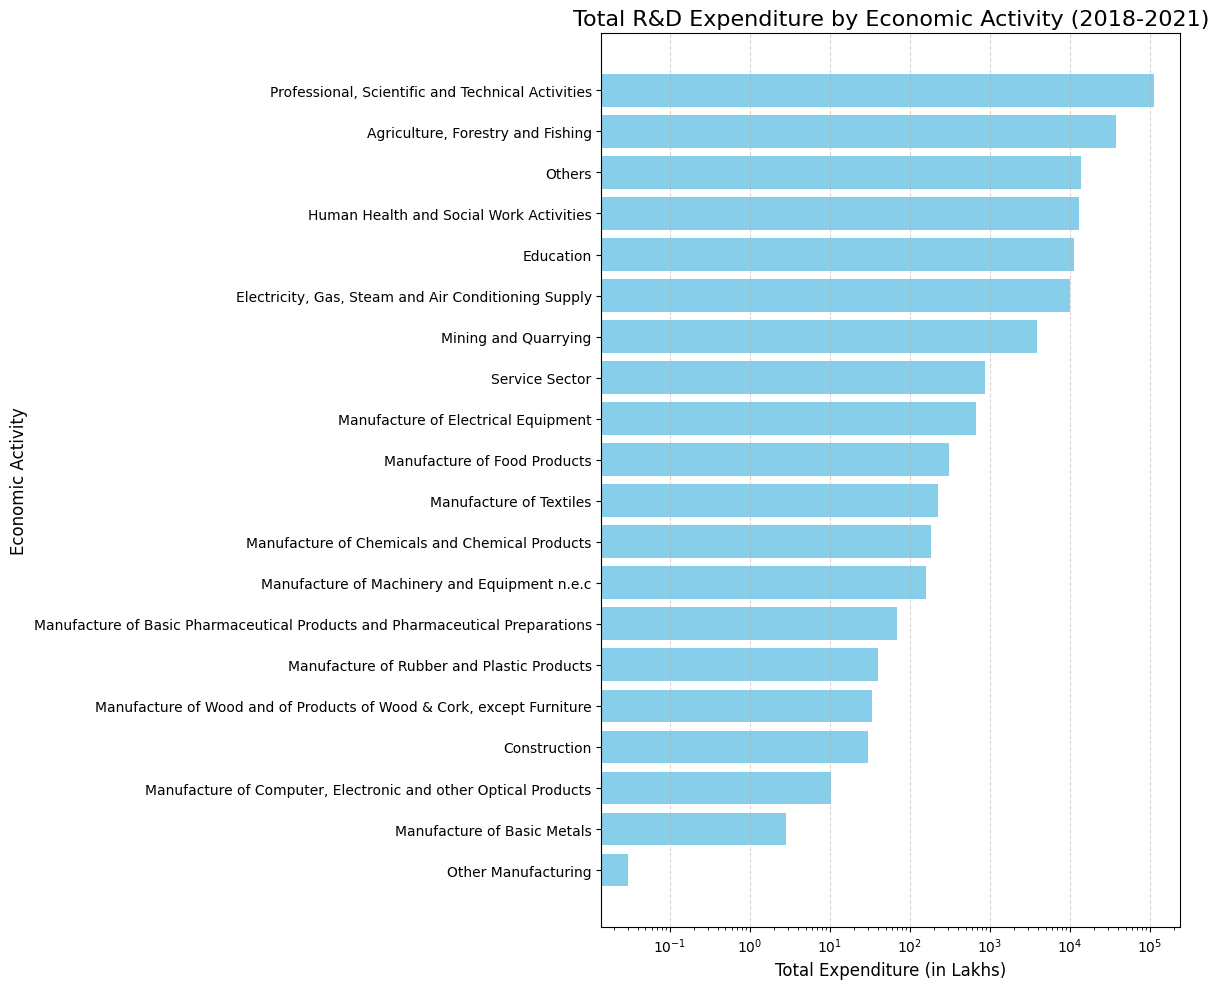

In [ ]:
# --- Bar Chart ---


# Calculate total R&D spending across the 3 years for each activity
df['Total_RD'] = df[expenditure_cols].sum(axis=1)
df_sorted = df.sort_values(by='Total_RD', ascending=True)

plt.figure(figsize=(12, 10))
plt.barh(df_sorted['Economic Activity'], df_sorted['Total_RD'], color='skyblue')

plt.title('Total R&D Expenditure by Economic Activity (2018-2021)', fontsize=16)
plt.xlabel('Total Expenditure (in Lakhs)', fontsize=12)
plt.ylabel('Economic Activity', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
# Using a log scale for the x-axis to accommodate the vast range in spending
plt.xscale('log')
plt.tight_layout()
plt.show()
